In [3]:
import torch
import os

import random
from torchvision.utils import make_grid
from matplotlib.pyplot import imshow

from utils import *
from model.config import ModelConfig
from model.vae import VAE
from dataset import PokemonDataset

In [22]:
MODEL_DIR = "logs/pokemon2000-vae"
MODEL_NAME = "latest_vae_model.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
loaded_config = load_config(os.path.join(MODEL_DIR, "config.yaml"))
model_config = ModelConfig(**loaded_config["model_config"])
vae = VAE(model_config).to(device)
vae.load_state_dict(
    torch.load(
        os.path.join(
            MODEL_DIR,
            MODEL_NAME,
        ),
        map_location=device,
    )
)
vae.eval()

VAE(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
      )
      (1): Sequential(
        (0): _ResidualBlock(
          (expand): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
          (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): LeakyReLU(negative_slope=0.2)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): LeakyReLU(negative_slope=0.2)
        )
      

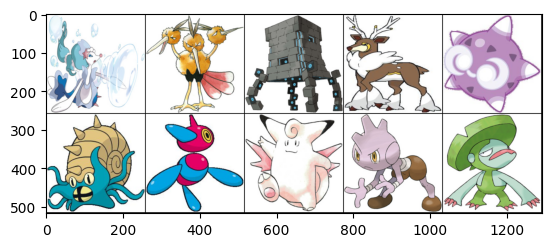

In [ ]:
# data = PokemonDataset(root_dir="test_images", transform=None)
data = PokemonDataset(root_dir="data/val")

images = [data[i] for i in range(10)]

batch_images = torch.stack(images)
images_grid = make_grid(batch_images, nrow=5, normalize=True)
imshow(images_grid.permute(1, 2, 0).cpu().numpy())

batch_images = batch_images.to(device)
recon_img = vae.sample(images=batch_images)

In [32]:
recon_grid = make_grid(recon_img, nrow=5, normalize=True)

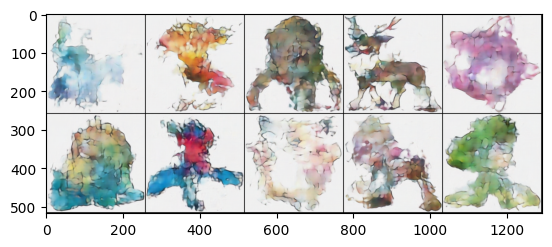

In [33]:
imshow(recon_grid.permute(1, 2, 0).cpu().numpy())

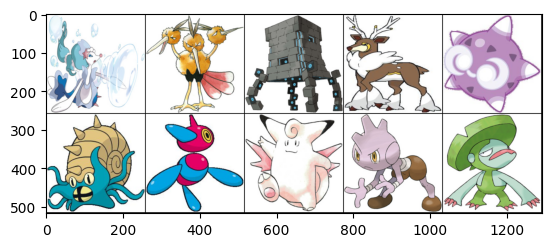

In [34]:
imshow(images_grid.permute(1, 2, 0).cpu().numpy())

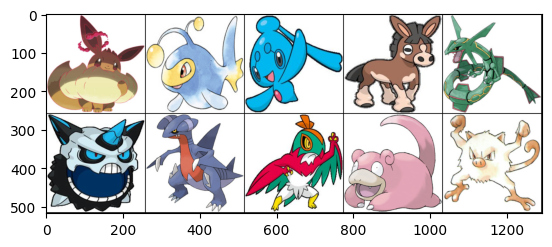

In [ ]:
# data = PokemonDataset(root_dir="test_images", transform=None)
data = PokemonDataset(root_dir="data/train")
images = [data[i] for i in range(10)]

batch_images = torch.stack(images)
images_grid = make_grid(batch_images, nrow=5, normalize=True)
batch_images = batch_images.to(device)
recon_img = vae.sample(images=batch_images)
recon_grid = make_grid(recon_img, nrow=5, normalize=True)

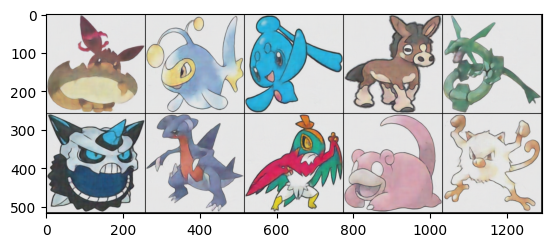

In [36]:
imshow(recon_grid.permute(1, 2, 0).cpu().numpy())

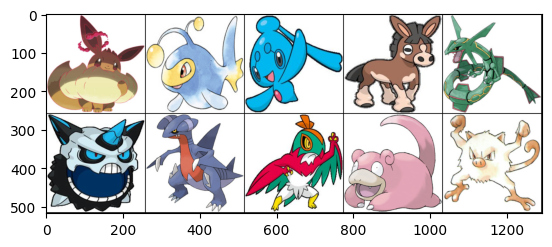

In [37]:
imshow(images_grid.permute(1, 2, 0).cpu().numpy())